In [1]:
%load_ext autoreload
%autoreload 2

from utils.data_download import download_data_with_animation, unzip_data


# Download data

In [2]:
# data will only be downloaed when the output file does not exist. In this case the file is ./data/data.zip
# if there is any issues remove everything under ./data and run the code again
url='https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F27069%2F46974%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240422%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240422T195446Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D27f3460b8b1512fc77d5fa919e5f7471c55fe552037869b78d43ddb33f80831a03ed39077650fd90b858ed2f101d2f468053a7199462f3513d0b8dcc100674f5469a5c0a008151acc0041a3bc7074be4d33b2d65462aa5f4e6988f27c8e89737c60fe8dfc0a245cd3915303c5e4488db745aafae9a1a4e6caf34a0000fed7eec3d0a6723983064916e2e2993cc94612de815d32cc9d345622158e7569c4cc0d541cb2b5d0d705461e3821e7c881248dc22390f1a2fed45f2794a442fd3bbb4d727151d4eb5390f37b3a1d167facb8ea5c5b8b79a054e93e90371a96b2c1e3be8549bd09c9a37278fcfeb38aba093157906271145184ddc0f32799f1013733631'
download_data_with_animation(url, "./data/data.zip")


./data/data.zip already exists, skipping download.


# unzip data

In [3]:
# data will only be unzipped when the output folder does not exist. In this case the folder is ./data/unziped_data
# if there is any issues remove everything under ./data/** and run the code again
unzip_data("./data/data.zip", "./data/unzipped_data/")

./data/unzipped_data/ already exists, skipping unzip.


In [4]:
# get all the data files 
import os
data_files = [] 
for root, dirs, files in os.walk("./data/unzipped_data/") :
	for file in files:
		data_files.append( os.path.join(root, file).replace('\\', '/') )
  
data_files


['./data/unzipped_data/cv10_labels.npy',
 './data/unzipped_data/test10_labels.npy',
 './data/unzipped_data/cv10_data/cv10_data.npy',
 './data/unzipped_data/test10_data/test10_data.npy',
 './data/unzipped_data/training10_0/training10_0.tfrecords',
 './data/unzipped_data/training10_1/training10_1.tfrecords',
 './data/unzipped_data/training10_2/training10_2.tfrecords',
 './data/unzipped_data/training10_3/training10_3.tfrecords',
 './data/unzipped_data/training10_4/training10_4.tfrecords']

In [5]:
training_files = [file for file in data_files if "training" in file]
training_files

['./data/unzipped_data/training10_0/training10_0.tfrecords',
 './data/unzipped_data/training10_1/training10_1.tfrecords',
 './data/unzipped_data/training10_2/training10_2.tfrecords',
 './data/unzipped_data/training10_3/training10_3.tfrecords',
 './data/unzipped_data/training10_4/training10_4.tfrecords']

# Read the data from the training files 
The training data is being given in tfrecords (tensorflow files). need to convert it to numpy arrays


In [6]:
test_files =  './data/unzipped_data/test10_data/test10_data.npy'
test_files_labels =  './data/unzipped_data/test10_labels.npy'

cross_validation_files =  './data/unzipped_data/cv10_data/cv10_data.npy'
cross_validation_files_labels = './data/unzipped_data/cv10_labels.npy'


In [7]:
# load data test and cross validation data
import numpy as np
test_data_ng = np.load( test_files)
test_data_labels = np.load(  test_files_labels) 
cv_data_ng = np.load( cross_validation_files)
cv_data_labels = np.load( cross_validation_files_labels)


In [8]:
test_data_ng.shape # an array of 3d arrays, but need to be reshaped to 2d arrays
# #### Keep images at 3rd dimension, since CNN work better at 3rd dimension ( )
# # # # reshape the data to 2d arrays
# test_data = np.array([x.reshape(x.shape[0], -1) for x in test_data])
# test_data.shape

(7682, 299, 299, 1)

# Data issue 
The data from CV only contains only calcifications and test files only contain masses.  

"**Note** - The data has been separated into training and test as per the division in the CBIS-DDSM dataset. The test files have been divided equally into test and validation data. However the split between test and validation data was done incorrectly, resulted in the test numpy files containing only masses and the validation files containing only calcifications. These files should be combined in order to have balanced and complete test data.
"

In [9]:
len(cv_data_ng) == len(cv_data_labels) # True

True

In [16]:
from typing import TypedDict
d_type = TypedDict('d_type', 
                           {'data': np.ndarray, 'label': np.ndarray}
                           )
new_cv_data : d_type = {'data': np.array([]), 'label': np.array([])}
new_test_data : d_type = {'data': np.array([]), 'label': np.array([])}
n_test = []  # data, label 
n_cv = [] # data, label 
for i in range( len(cv_data_ng)):
	if i%2: # odd 	
		n_test.append(   (cv_data_ng[i], cv_data_labels[i])   )
		n_test.append(   (test_data_ng[i], test_data_labels[i])   )
	else:
		n_cv.append(   (cv_data_ng[i], cv_data_labels[i])   )
		n_cv.append(   (test_data_ng[i], test_data_labels[i])   )

new_cv_data['data'] = np.array([x[0] for x in n_cv])
new_cv_data['label'] = np.array([1 if x[1]>0 else 0 for x in n_cv]) # FIX: value should be if label is > 0 

new_test_data['data'] = np.array([x[0] for x in n_test])
new_test_data['label'] = np.array([1 if x[1]>0 else 0 for x in n_test]) #  IX: value should be if label is > 0

In [17]:
new_cv_data['data'].shape

(7682, 299, 299, 1)

# Visualize the data

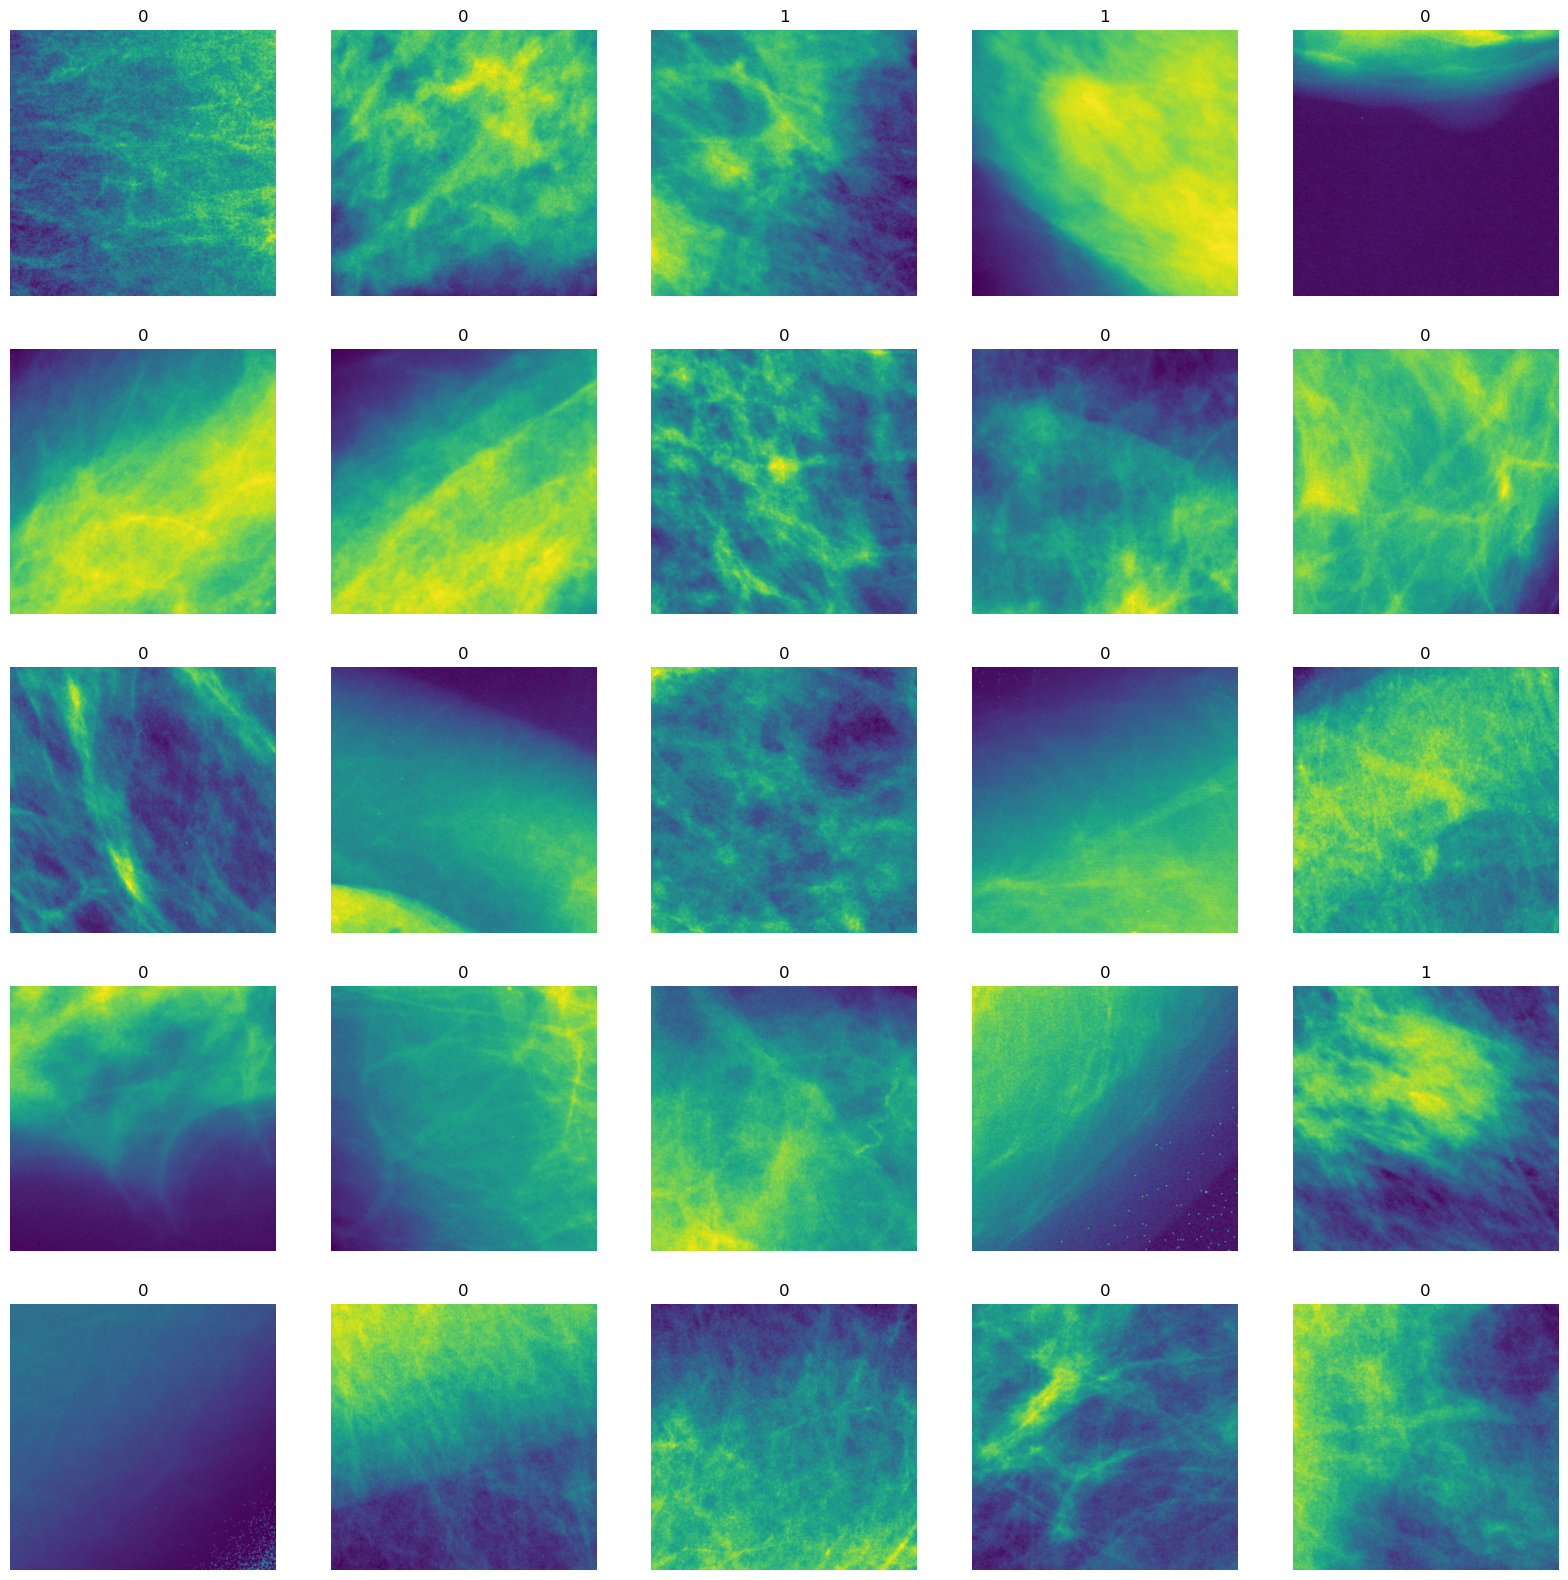

In [19]:
import matplotlib.pyplot as plt

nrows = 5
ncols = 5

plt.figure(figsize=(20, 20))
for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(new_cv_data["data"][i], )
    plt.title(new_cv_data["label"][i])
    # Remove the axis
    plt.axis('off')

# Show the plot
# plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

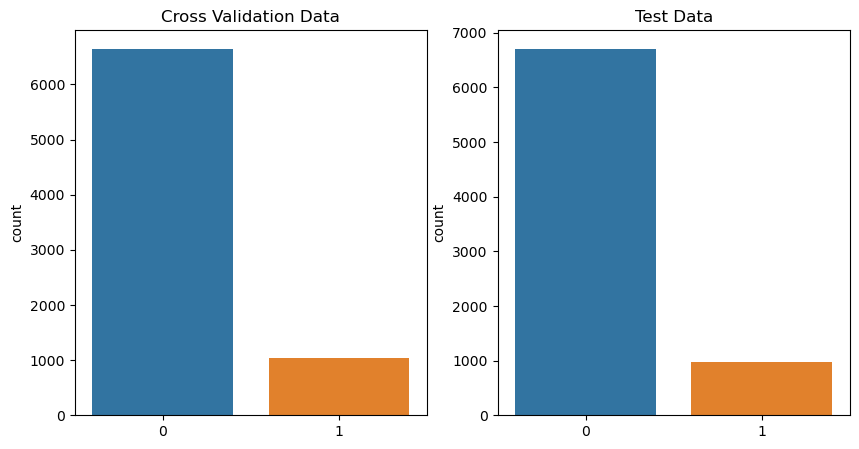

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
a = [1, 1, 0, 0 ,3,3]
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=new_cv_data['label'])
plt.title("Cross Validation Data")
plt.subplot(1, 2, 2)
plt.title("Test Data")
sns.countplot(x=new_test_data['label'])

plt.show()
